In [1]:
import matplotlib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def compare_dist(src, dst):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.distplot(src, ax=ax)
    sns.distplot(dst, ax=ax)

In [3]:
def compute_confidence_interval(data):
    std = np.std(data)
    mean = np.mean(data)
    return [mean - std, mean + std]

In [11]:
def draw_interval_box(x, width, ax=None, y=0, hight=1, color="blue", alpha=1): 
    if ax is None:
        fig, ax = plt.subplots(figsize=(14, 3))
    p_bbox = matplotlib.patches.FancyBboxPatch((x, y),
                            width, hight,
                            boxstyle="square,pad=0.1",
                            ec="k", fc=color, alpha=alpha, zorder=10.)
    ax.set_xlim(-5, 5)
    ax.add_patch(p_bbox)
    
def compare_intervals(samples, colors=["blue", "red"], alphas=[0.8, 0.2]):
    fig = plt.figure(figsize=(14, 3))
    size = len(samples)
    for i in range(size):
        ax = fig.add_subplot(1, 1, 1)
        sample = compute_confidence_interval(samples[i])
        draw_interval_box(sample[0], abs(sample[0] - sample[1]), 
                          alpha=alphas[i], ax=ax, color=colors[i])

# Rechazar o aceptar la hipotesis nula basada en este metodo

https://www.youtube.com/watch?v=d6MbyCmnsJo&feature=youtu.be
    
El solo calcula los intervalos de confianza de las 2 muestras y verfica que no se cruzan para así proceder a
rechazarla.

Para verificar su metodo voy a generar 2 muestras de una distribución normal con la misma media y sigma, las 2 poblaciones deberían ser iguales y por ende los intervalos de confianza también.

In [12]:
def gen_normal_pair(mu=0, sigma=3, N=1000):
    s1 = np.random.normal(mu, sigma, N)
    s2 = np.random.normal(mu, sigma, N)
    return [s1, s2]

## Inicio la prueba generando una mustra pequeña

- 10 elementos

In [13]:
sample_size = gen_normal_pair(N=10)

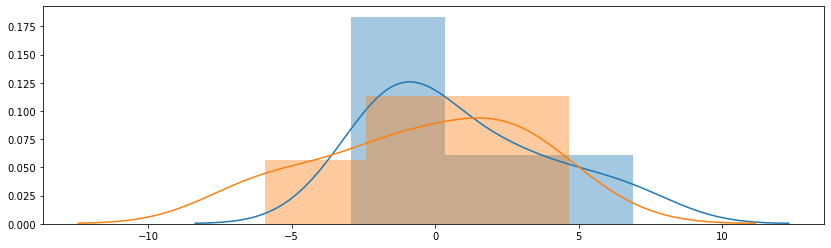

In [14]:
compare_dist(sample_size[0], sample_size[1])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


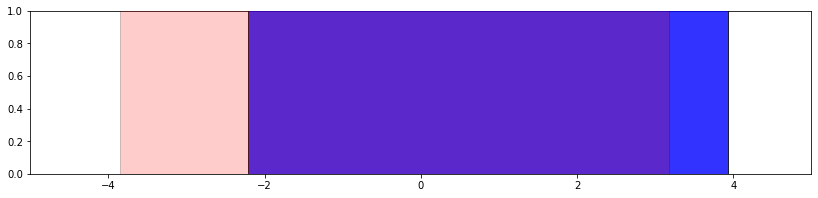

In [15]:
compare_intervals(sample_size)

## Generando una mustra mediana

- 100 elementos

In [16]:
sample_size = gen_normal_pair(N=100)

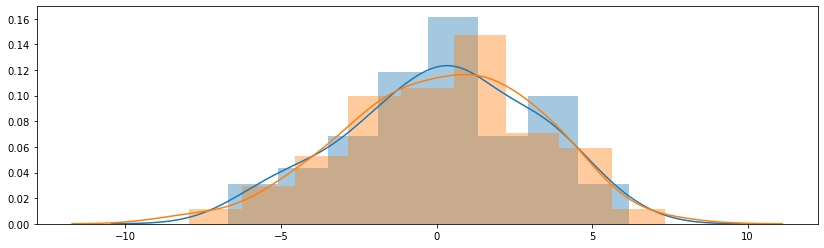

In [17]:
compare_dist(sample_size[0], sample_size[1])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


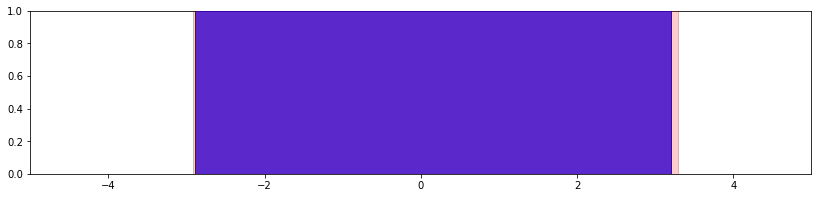

In [18]:
compare_intervals(sample_size)

## Generando una mustra grande

- 10000 elementos

In [19]:
sample_size = gen_normal_pair(N=10000)

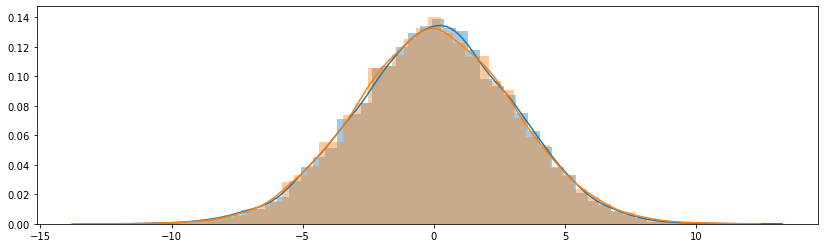

In [20]:
compare_dist(sample_size[0], sample_size[1])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


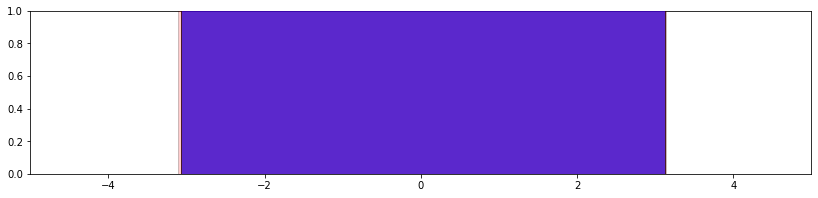

In [21]:
compare_intervals(sample_size)

# Rechazar o aceptar la hipotesis nula usando el p-vlaue

Este video aunque esta enfocado a bio estadistica y da ejemplos de este tipo explica los conceptos de manera clara
y simple: https://www.youtube.com/watch?v=YSwmpAmLV2s

- Para el ejemplo voy a aplicar el test shapiro, shapiro busca determinar si una muestra tiene distribución normal.

La hipotesis nula indica que la muestra viene de una distribución normal, la hipotesis alternativa que no.

In [27]:
from scipy.stats import shapiro

In [115]:
def gen_normal(mu=0, sigma=3, N=1000):
    s1 = np.random.normal(mu, sigma, N)
    return s1

def gen_uniform(mu=0, sigma=3, N=1000):
    s1 = np.random.uniform(mu, sigma, N)
    return s1

def gen_binomial(p=0.5, n=10, N=1000):
    s1 = np.random.binomial(n, p, N)
    return s1

def plot_shapiro_against_N(min_value=5, max_value=1000, f=gen_normal):
    results = []
    for i in range(min_value, max_value, 20):
        results.append(np.concatenate([
            [i], shapiro(f(N=i))
        ]))
    results = list(zip(*results))
    plt.plot(results[0], results[1], color="blue", label="statistic")
    plt.plot(results[0], results[2], color="green", label="p-value")

## NORMAL: Gráficar el p-value y el estadistico contra el número de muestras

Contrario a lo que pense el p-value no mejora con el número de muestras, el estadistico en cambio converge a uno. Los valores del p-value cambian mucho durante cada ejecución.

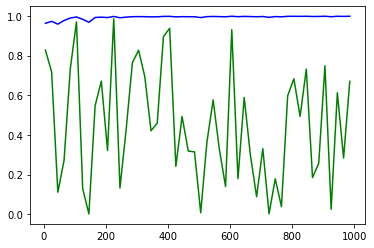

In [98]:
plot_shapiro_against_N()

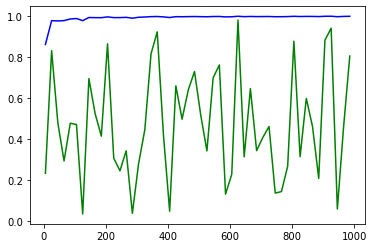

In [99]:
plot_shapiro_against_N()

## UNIFORME: Gráficar el p-value y el estadistico contra el número de muestras

Por otro lado el p-value de un distribución uniforme rapidamente converge a cero

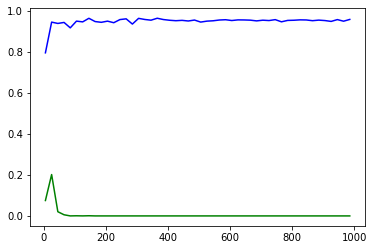

In [101]:
plot_shapiro_against_N(f=gen_uniform)

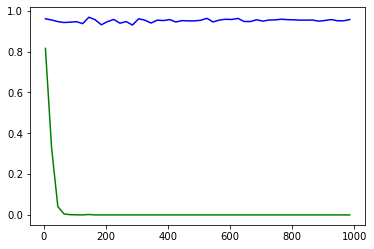

In [102]:
plot_shapiro_against_N(f=gen_uniform)

## BINOMIAL: Gráficar el p-value y el estadistico contra el número de muestras

Por otro lado el p-value de un distribución uniforme rapidamente converge a cero

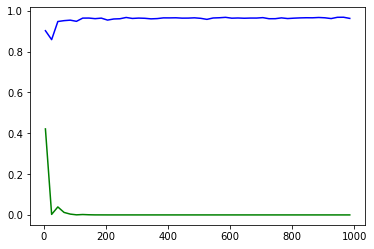

In [118]:
plot_shapiro_against_N(f=gen_binomial)

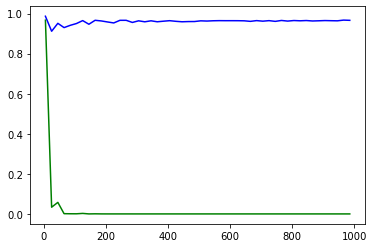

In [119]:
plot_shapiro_against_N(f=gen_binomial)

## Gráficar la distribución del p-value

In [347]:
STATISTICS = "Promedio: {}, Desviación estandar: {}"

def plot_disitributions(data, title):
    print(title + " --> " + STATISTICS.format(np.mean(data), np.std(data)))

    fig = plt.figure(figsize=(14, 4))
    fig.suptitle(title)
    ax = fig.add_subplot(1, 2, 1)
    ax.grid(color='r', linestyle='-', linewidth=0.5)
    sns.distplot(data, ax=ax, bins=100)
    
    ax = fig.add_subplot(1, 2, 2)
    ax.grid(color='r', linestyle='-', linewidth=0.5)
    kwargs = {'cumulative': True}
    sns.distplot(data, ax=ax, hist_kws=kwargs, kde_kws=kwargs, bins=100)
    
def plot_p_value_dist(N = 1000, k = 1000, f=gen_normal, plots=True):
    a = list(map(lambda e: f(N=k), range(N)))
    b = list(map(lambda e: shapiro(e), a))
    c = list(zip(*a))
    if plots:
        plot_disitributions(c[1], "p-value distribution")
        plot_disitributions(c[0], "statistic distribution")
    return np.array(c[0])

### NORMAL: Gráficar la distribución del p-value

p-value distribution --> Promedio: -0.11028370839745918, Desviación estandar: 2.921688201942671
statistic distribution --> Promedio: 0.02114829845822623, Desviación estandar: 2.96330256917524


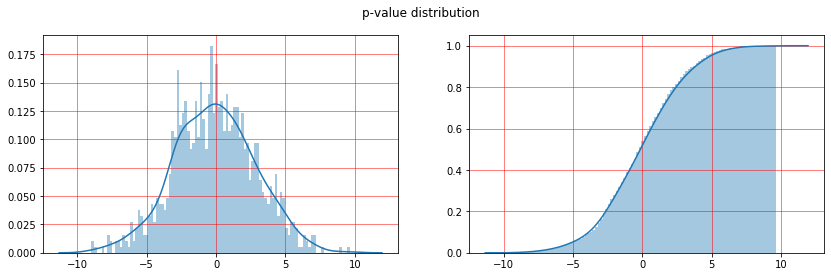

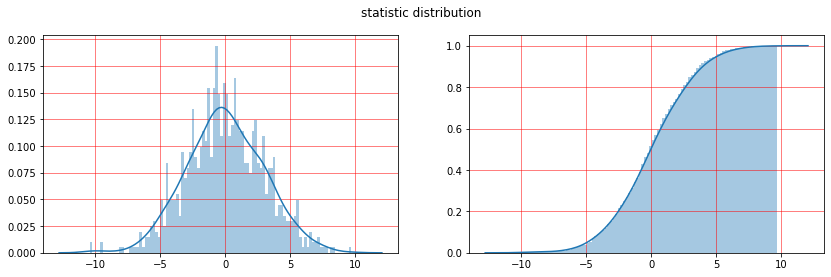

In [348]:
statistic = plot_p_value_dist()

### UNIFORME: Gráficar la distribución del p-value

p-value distribution --> Promedio: 1.4664256958140436, Desviación estandar: 0.8644028742379669
statistic distribution --> Promedio: 1.4947612216953758, Desviación estandar: 0.8757591401105913


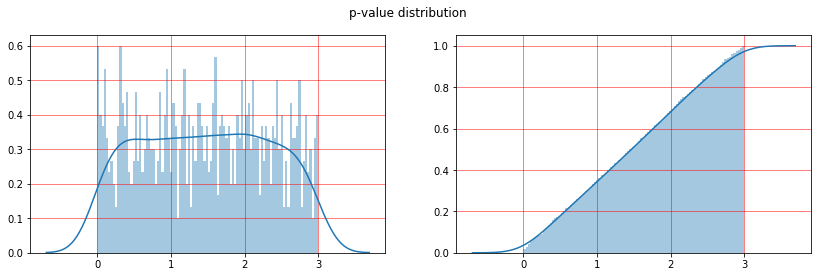

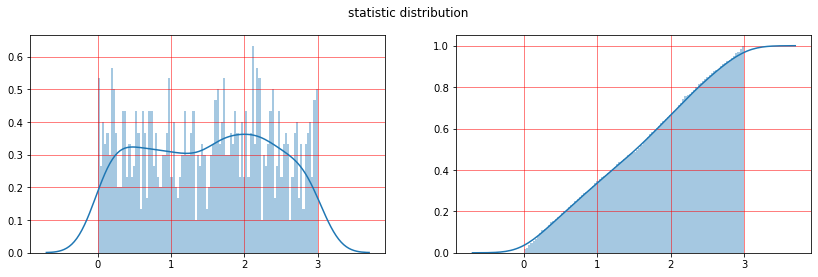

In [349]:
statistic = plot_p_value_dist(f=gen_uniform)

### BINOMIAL: Gráficar la distribución del p-value

p-value distribution --> Promedio: 5.074, Desviación estandar: 1.5850943189602316
statistic distribution --> Promedio: 5.033, Desviación estandar: 1.6564754752183928


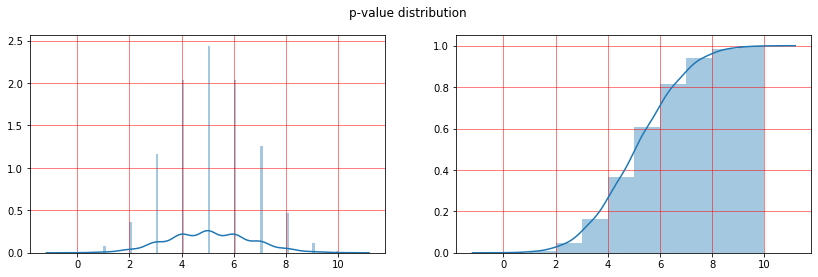

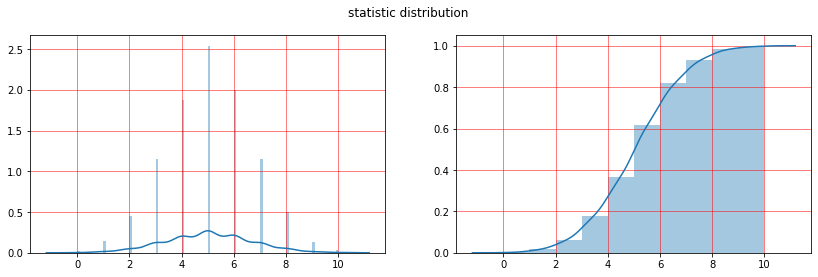

In [350]:
statistic = plot_p_value_dist(f=gen_binomial)

## Se falla en rechazar la hipotesis Nula

Para esta prueba se escoge un alfa de 0.05: Cual es la probabilidad de rechazar la hipotesis nula erroneamente?

- Usando las funciones de arriba puedo generar una muestra grande del estadistico que calcula shapiro, si el alpha habla de la probabilidad de encontrar un estadistico irregular que nos haga pensar de forma erronea que la distribución NO es es normal, la irregularidad de este estadistico debería resaltar al momento de observar el histograma de esta muestra. 

In [351]:
N = 1000
sample = gen_normal(N)
sample_shapiro = shapiro(sample)
normal_statistic = plot_p_value_dist(f=gen_uniform, plots=False, N=10000)

#bins = np.arange(min(normal_statistic), max(normal_statistic), (max(normal_statistic) - min(normal_statistic))/101)
hist, bins = np.histogram(normal_statistic, bins=bins)

In [352]:
## El resultado indica que la hipotesis no se puede rechazar por ende se acepta que la distribucón es normal

sample_shapiro

(0.999186098575592, 0.9506740570068359)

### El resultado del p-value es coherente con el histograma de estadisticos

- Al igual que el p-value de shapiro la probabilidad de encontrar un estadistico al menos tan grande como el observado es mayor a 0.05

In [355]:
## Probabilidad de encontrar un evento que es mayor que el estadistico en la muestra.

x = np.where(bins[:-1] > sample_shapiro[0])
np.sum(hist[x])/np.sum(hist)

0.6669358909641595

In [356]:
## Probabilidad de encontrar un evento que es mayor que el estadistico en la muestra.

x = np.where(normal_statistic > sample_shapiro[0])
len(normal_statistic[x])/len(normal_statistic)

0.6726

### Se rechaza la hipotesis nula cuando debio haberse aceptado, falso positivo

### Se falla en rechazar la hipotesis nula cuando debio haberse rechazado, positivo falso